In [10]:
!pip install mglearn

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import mglearn

In [12]:
# 1. Load Dataset
file_path = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/02.%20Week%202/Dataset/CitarumWater.csv"
df = pd.read_csv(file_path)

In [13]:
# 2. Explorasi Data
print(df.head())
print(df.info())
print(df.describe())

   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Colum

In [15]:
# 3. Data Preprocessing (Sesuaikan target variable)
target_column = 'Class'  # Ganti sesuai dengan dataset
y = df[target_column]
X = df.drop(columns=[target_column])

In [16]:
# 4. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# 5. Standarisasi Data (Hanya untuk fitur numerik)
numeric_features = X_train.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

In [19]:
# 6. Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
# 7. Evaluasi Model
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'AUC: {auc:.2f}')

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
AUC: 1.00


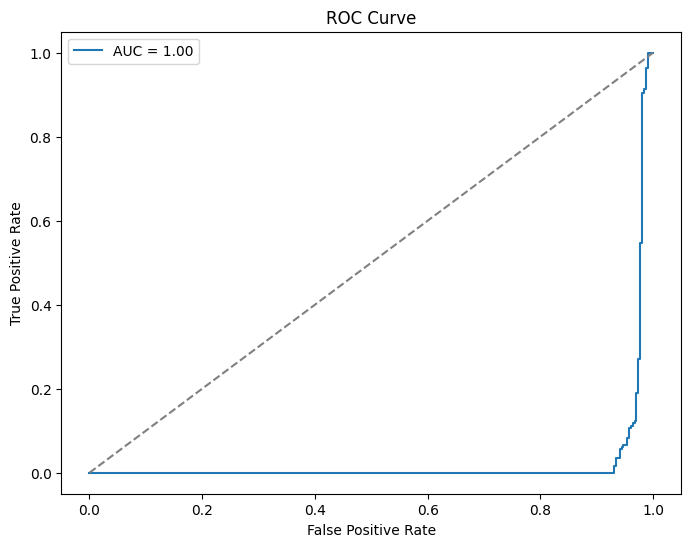

In [24]:
# 8. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

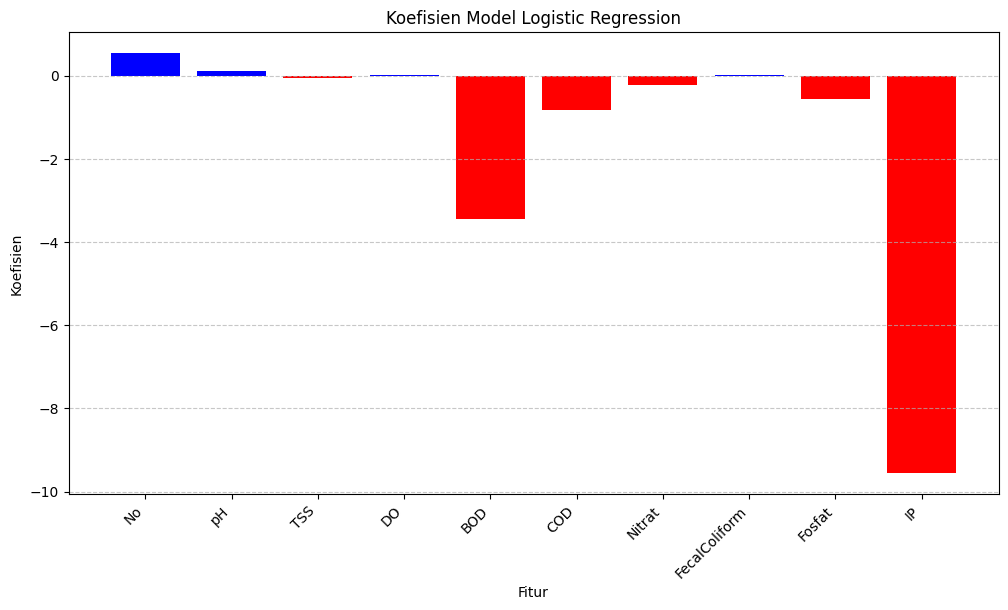

In [29]:
# Visualisasi Koefisien Model dengan Nama Fitur
plt.figure(figsize=(12, 6))
plt.bar(numeric_features, model.coef_[0], color=['red' if c < 0 else 'blue' for c in model.coef_[0]])
plt.xticks(rotation=45, ha='right')  # Putar label agar mudah dibaca
plt.xlabel("Fitur")
plt.ylabel("Koefisien")
plt.title("Koefisien Model Logistic Regression")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Penjelasan Persamaan Logistic Regression:

Persamaan Logistic Regression: **P(Y=1 | X) = 1 / (1 + exp(- (wX + b)))**

Penjelasan Metrik Evaluasi:
- Accuracy: (TP + TN) / (TP + TN + FP + FN)
- Precision: TP / (TP + FP)
- Recall: TP / (TP + FN)
- F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
- AUC: Area di bawah kurva ROC